<a href="https://colab.research.google.com/github/maryembenghouma/Freelance-Project/blob/main/Data_Preparation_%26_faisability_text_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importation Des Bibliothéques

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential

#biblio pour les images
from PIL import Image

import os

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet

importation du data

In [ ]:
!ls "/content/drive/MyDrive/Flipkart"

flipkart_com-ecommerce_sample_1050.csv	Images


In [ ]:
# loads and displays our summary statistics of our data
data = pd.read_table("/content/drive/MyDrive/Flipkart/flipkart_com-ecommerce_sample_1050.csv",sep=",", header=0)

Informations sur notre data

In [ ]:
data.shape

(1050, 15)

In [ ]:
print('Flipkart dataset containes ',data.shape[0],' rows and',data.shape[1],'columns.')

Flipkart dataset containes  1050  rows and 15 columns.


In [ ]:
data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [ ]:
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [ ]:
data.iloc[0].product_specifications

'{"product_specification"=>[{"key"=>"Brand", "value"=>"Elegance"}, {"key"=>"Designed For", "value"=>"Door"}, {"key"=>"Type", "value"=>"Eyelet"}, {"key"=>"Model Name", "value"=>"Abstract Polyester Door Curtain Set Of 2"}, {"key"=>"Model ID", "value"=>"Duster25"}, {"key"=>"Color", "value"=>"Multicolor"}, {"key"=>"Length", "value"=>"213 cm"}, {"key"=>"Number of Contents in Sales Package", "value"=>"Pack of 2"}, {"key"=>"Sales Package", "value"=>"2 Curtains"}, {"key"=>"Material", "value"=>"Polyester"}]}'

In [ ]:
# Vérifier s'il y a des valeurs manquantes dans toute la data
missing_values = data.isnull().sum()
print("Valeurs manquantes dans chaque colonne :\n", missing_values)


Valeurs manquantes dans chaque colonne :
 uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64


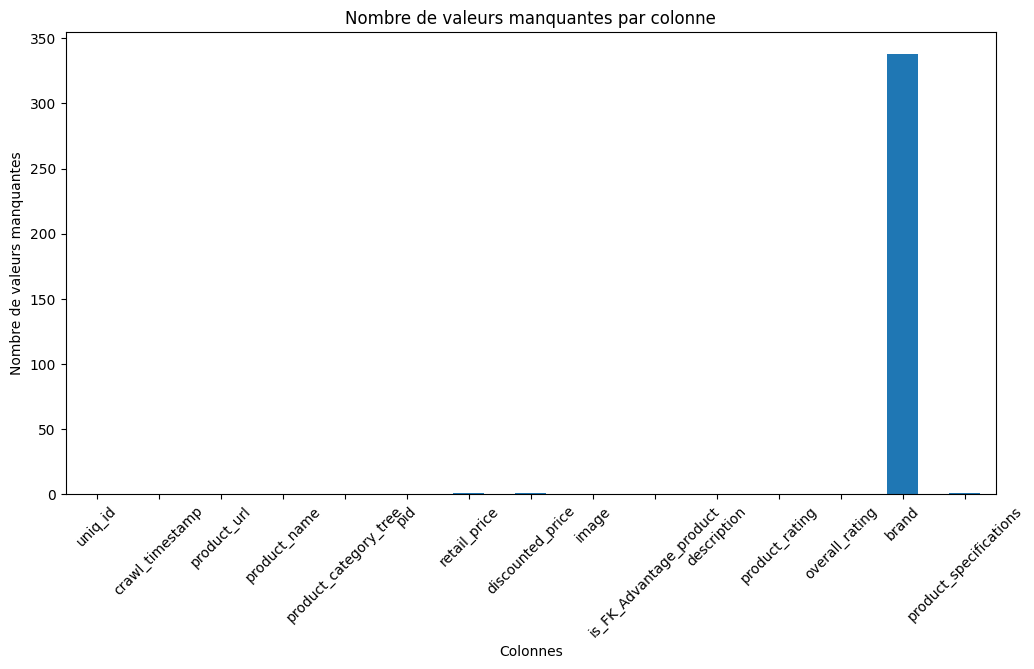

In [ ]:
import matplotlib.pyplot as plt

# Calculer le nombre de valeurs manquantes dans chaque colonne
missing_values = data.isnull().sum()

# Créer un graphique
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar')
plt.title('Nombre de valeurs manquantes par colonne')
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.xticks(rotation=45)
plt.show()


==> on remarque que brand contient presque 350 valeurs manquantes

* price de décision :
=> le brand de la marque joue un role cruciale donc on va remplir les colonnes ayant des valeurs manquantes par la brand la plus fréqunetes d'ou lors du traitement on va faire une "imputation par la valeur la plus fréquente"

In [ ]:
most_frequent_brand = data['brand'].value_counts().idxmax()
print("La marque la plus fréquente est :", most_frequent_brand)


La marque la plus fréquente est : PRINT SHAPES


In [ ]:
# remplir les colonnes vides par la brand la plus fréquente
data['brand'] = data['brand'].fillna(most_frequent_brand)


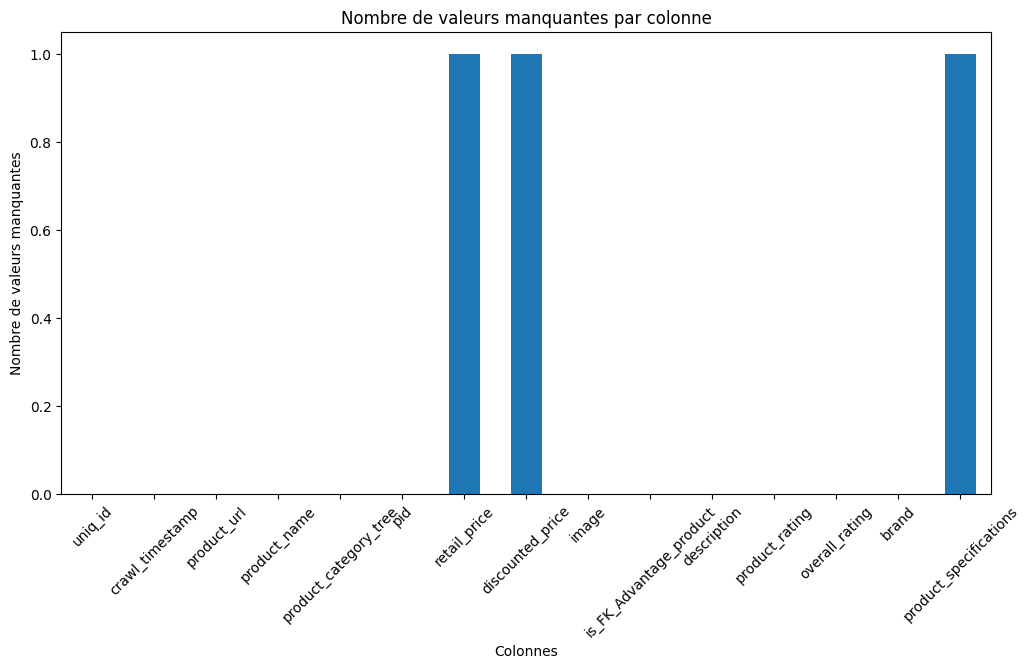

In [ ]:
#vérifiant maintenat si on a encore des valeurs manquantes
import matplotlib.pyplot as plt

# Calculer le nombre de valeurs manquantes dans chaque colonne
missing_values = data.isnull().sum()

# Créer un graphique
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar')
plt.title('Nombre de valeurs manquantes par colonne')
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.xticks(rotation=45)
plt.show()


remarque : apres avoir faire l'imputation du brand on remarque qu'il se crée des valeurs manquantes dans les 3 colonnes retail_price, discounted_priceetproduct_specifications qui sont moins important que brand doonc pour corriger ca on va faire une imputation par médiane dans les 3  colonnes.   

In [ ]:
# Imputation pour 'discounted_price' et 'retail_price'
data['discounted_price'].fillna(data['discounted_price'].median(), inplace=True)
data['retail_price'].fillna(data['retail_price'].median(), inplace=True)

# Imputation pour 'product_specifications'
most_frequent_spec = data['product_specifications'].mode()[0]
data['product_specifications'].fillna(most_frequent_spec, inplace=True)


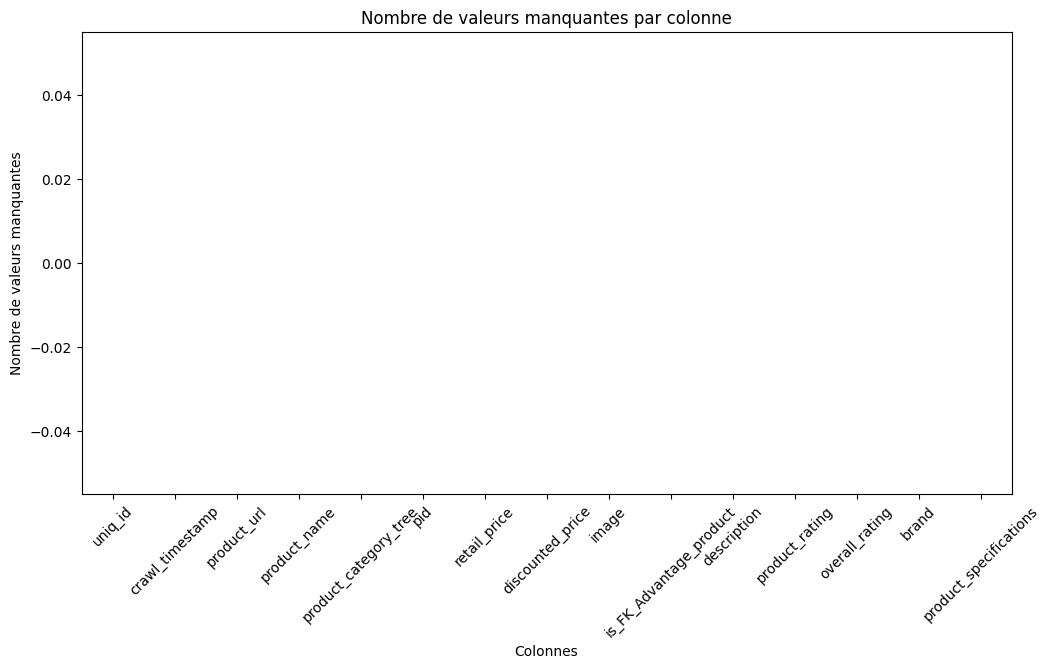

In [ ]:
#vérifiant s'il ya encore des valeurs manquantes

import matplotlib.pyplot as plt

# Calculer le nombre de valeurs manquantes dans chaque colonne
missing_values = data.isnull().sum()

# Créer un graphique
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar')
plt.title('Nombre de valeurs manquantes par colonne')
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.xticks(rotation=45)
plt.show()


In [ ]:
data.duplicated().sum()

0

===> on n'a pas de duplicated values .

In [ ]:
data.iloc[0].product_category_tree

'["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

Remarque : on va y ajouter 3 nouvelles colonnes (category,subcategory et product)  qui contiennent les informations des produits car apres on va utiliser notre target category c'est tout qui contient l'infomations nécessaire sur le produit

In [ ]:
data['category'] = data['product_category_tree'].apply(lambda x : x.split('>>')[0].strip('[]" '))

In [ ]:
data['subcategory'] = data['product_category_tree'].apply(lambda x : x.split('>>')[1].strip('[]" '))

In [ ]:
data['product'] = data['product_category_tree'].apply(lambda x: x.split('>>')[2].strip('[]" ') if len(x.split('>>')) > 2 else None)

In [ ]:
data.category.value_counts()

Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: category, dtype: int64

==> on remarque qu'on a 7 catégories de produits

<Axes: ylabel='category'>

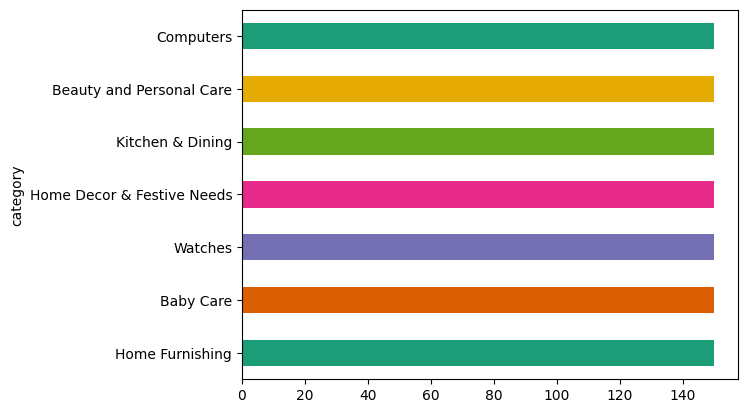

In [ ]:
data.category.value_counts().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

In [ ]:
data.subcategory.value_counts()

subcategory
Wrist Watches                      149
Laptop Accessories                  87
Infant Wear                         84
Coffee Mugs                         74
Showpieces                          71
                                  ... 
Consumables & Disposables            1
TRUE Home Decor & Festive Needs      1
JMD Home Furnishing                  1
Kripa's Home Furnishing              1
Beauty Accessories                   1
Name: count, Length: 62, dtype: int64

In [ ]:
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category,subcategory,product
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,Curtains
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin,Baby Bath Towels
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,999.0,600.0,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,Baby Bath & Skin,Baby Bath Towels
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Bed Linen,Bedsheets
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Bed Linen,Bedsheets


In [ ]:
data.shape

(1050, 18)

In [ ]:
import pandas as pd
import re

# Fonction pour nettoyer le texte
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Supprimer les balises HTML
    text = re.sub(r'http\S+', '', text)  # Supprimer les URLs
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text)  # Supprimer les caractères spéciaux sauf les lettres et les chiffres
    return text.strip()  # Supprimer les espaces au début et à la fin

# Colonnes à nettoyer
columns_to_clean = ['product_name', 'product_category_tree', 'description', 'brand', 'product_specifications']



# Nettoyer les colonnes textuelles
for column in columns_to_clean:
    if data[column].dtype == 'object':
        data[column] = data[column].apply(clean_text)


In [ ]:
data.iloc[0].description

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain Elegance Polyester Multicolor Abstract Eyelet Door Curtain 213 cm in Height Pack of 2 Price Rs 899 This curtain enhances the look of the interiors This curtain is made from 100 high quality polyester fabric It features an eyelet style stitch with Metal Ring It makes the room environment romantic and loving This curtain is ant wrinkle and anti shrinkage and have elegant apparance Give your home a bright and modernistic appeal with these designs The surreal attention is sure to steal hearts These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening you create the most special moments of joyous beauty given by the soothing prints Bring home the elegant curtain that softly filters light in your room so that you get the ri

In [ ]:
data['description']

0       Key Features of Elegance Polyester Multicolor ...
1       Specifications of Sathiyas Cotton Bath Towel 3...
2       Key Features of Eurospa Cotton Terry Face Towe...
3       Key Features of SANTOSH ROYAL FASHION Cotton P...
4       Key Features of Jaipur Print Cotton Floral Kin...
                              ...                        
1045    Oren Empower Extra Large Self Adhesive Sticker...
1046    Wallmantra Large Vinyl Sticker Sticker Pack of...
1047    Buy Uberlyfe Extra Large Pigmented Polyvinyl F...
1048    Buy Wallmantra Medium Vinyl Sticker Sticker fo...
1049    Buy Uberlyfe Large Vinyl Sticker for Rs 595 on...
Name: description, Length: 1050, dtype: object

In [ ]:
import pandas as pd


# Vérification des valeurs manquantes
missing_values = data['description'].isnull().sum()

# Vérification des doublons
duplicate_values = data.duplicated(subset='description').sum()

# Vérification des mots vides
empty_values = data['description'].str.strip().eq('').sum()

# Vérification de la ponctuation
punctuation_values = data['description'].str.contains('[^\w\s]').sum()

# Vérification de la longueur des descriptions
description_length = data['description'].str.len()

# Affichage des résultats
print("Valeurs manquantes:", missing_values)
print("Doublons:", duplicate_values)
print("Mots vides:", empty_values)
print("Ponctuation:", punctuation_values)
print("Longueur des descriptions:")
print(description_length)


Valeurs manquantes: 0
Doublons: 0
Mots vides: 0
Ponctuation: 0
Longueur des descriptions:
0       1403
1        434
2       1220
3        842
4       1175
        ... 
1045    2271
1046    1571
1047     252
1048     204
1049     181
Name: description, Length: 1050, dtype: int64


Interprétation :

* 1.Valeurs manquantes : Il n'y a aucune valeur manquante dans la colonne des descriptions.
* 2.Doublons : Il n'y a aucun doublon parmi les descriptions.
* 3.Mots vides : Aucune description ne contient uniquement des espaces ou est vide.
* 4.Ponctuation : Il y a un total de 1049 occurrences de caractères de ponctuation dans l'ensemble des descriptions.
* 5.Longueur des descriptions : La longueur des descriptions varie considérablement, allant de 210 à 2432 caractères.

Price de Décision :
* ==>la présence d'une quantité significative de ponctuation dans les descriptions peut nécessiter une attention
lors du prétraitement des données textuelles, notamment en ce qui concerne la suppression ou la gestion appropriée de la ponctuation.

* ==> La variation de la longueur des descriptions indique également que des méthodes de normalisation ou de traitement de la longueur peuvent être nécessaires pour garantir une analyse cohérente des données.



In [ ]:
dt = data[['description']].copy()

In [ ]:
dt.head()

,description
0,Key Features of Elegance Polyester Multicolor ...
1,Specifications of Sathiyas Cotton Bath Towel 3...
2,Key Features of Eurospa Cotton Terry Face Towe...
3,Key Features of SANTOSH ROYAL FASHION Cotton P...
4,Key Features of Jaipur Print Cotton Floral Kin...


1. Make all text lower case

In [ ]:
dt['lower_case'] = dt['description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dt['lower_case'].head()

0    key features of elegance polyester multicolor ...
1    specifications of sathiyas cotton bath towel 3...
2    key features of eurospa cotton terry face towe...
3    key features of santosh royal fashion cotton p...
4    key features of jaipur print cotton floral kin...
Name: lower_case, dtype: object

2.  Removing Punctuation ( from description)

In [ ]:
def remove_punctuation_special_chars(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', ' ', text)
    return text

In [ ]:
dt['no_punctuation'] = dt['lower_case'].apply(lambda x: remove_punctuation_special_chars(x))
dt.head()

,description,lower_case,no_punctuation
0,Key Features of Elegance Polyester Multicolor ...,key features of elegance polyester multicolor ...,key features of elegance polyester multicolor ...
1,Specifications of Sathiyas Cotton Bath Towel 3...,specifications of sathiyas cotton bath towel 3...,specifications of sathiyas cotton bath towel 3...
2,Key Features of Eurospa Cotton Terry Face Towe...,key features of eurospa cotton terry face towe...,key features of eurospa cotton terry face towe...
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,key features of santosh royal fashion cotton p...,key features of santosh royal fashion cotton p...
4,Key Features of Jaipur Print Cotton Floral Kin...,key features of jaipur print cotton floral kin...,key features of jaipur print cotton floral kin...


3. Removal of Stop Words

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = set(stopwords.words('english'))
dt['no_stopwords'] = dt['no_punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dt.head()

,description,lower_case,no_punctuation,no_stopwords
0,Key Features of Elegance Polyester Multicolor ...,key features of elegance polyester multicolor ...,key features of elegance polyester multicolor ...,key features elegance polyester multicolor abs...
1,Specifications of Sathiyas Cotton Bath Towel 3...,specifications of sathiyas cotton bath towel 3...,specifications of sathiyas cotton bath towel 3...,specifications sathiyas cotton bath towel 3 ba...
2,Key Features of Eurospa Cotton Terry Face Towe...,key features of eurospa cotton terry face towe...,key features of eurospa cotton terry face towe...,key features eurospa cotton terry face towel s...
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,key features of santosh royal fashion cotton p...,key features of santosh royal fashion cotton p...,key features santosh royal fashion cotton prin...
4,Key Features of Jaipur Print Cotton Floral Kin...,key features of jaipur print cotton floral kin...,key features of jaipur print cotton floral kin...,key features jaipur print cotton floral king s...


In [ ]:
freq = pd.Series(' '.join(dt['no_stopwords']).split()).value_counts()[:60]
freq

rs                911
products          631
free              618
buy               581
delivery          567
cash              564
shipping          564
genuine           564
replacement       559
1                 557
cm                543
day               540
30                498
flipkart          481
com               473
guarantee         471
online            396
features          395
specifications    371
price             352
watch             330
color             328
mug               327
baby              320
pack              317
material          312
set               310
type              304
cotton            299
box               292
general           288
5                 286
package           269
analog            262
sales             261
number            253
warranty          250
3                 245
quality           245
2                 235
details           235
product           233
brand             232
best              230
model             226
design    

* From these words, I want to remove ‘rs’, ‘free’, ‘online’, ‘cm’, ‘day’, ‘flipkart com’,‘ml’,‘inch’,‘g’  because they don’t make much sense. Let’s add them to the list of the stopwords:


In [ ]:
add_words = ["rs","cm","ml","flipkart", "com","inch","g","l","lbs","ltr","gb","mm","cms","mbps","tms","ms","hour"]
stop_added = stop.union(add_words)

# Remove the extra stopwords
dt['no_stopwords'] = dt['no_stopwords'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_added))

dt.head()

,description,lower_case,no_punctuation,no_stopwords
0,Key Features of Elegance Polyester Multicolor ...,key features of elegance polyester multicolor ...,key features of elegance polyester multicolor ...,key features elegance polyester multicolor abs...
1,Specifications of Sathiyas Cotton Bath Towel 3...,specifications of sathiyas cotton bath towel 3...,specifications of sathiyas cotton bath towel 3...,specifications sathiyas cotton bath towel 3 ba...
2,Key Features of Eurospa Cotton Terry Face Towe...,key features of eurospa cotton terry face towe...,key features of eurospa cotton terry face towe...,key features eurospa cotton terry face towel s...
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,key features of santosh royal fashion cotton p...,key features of santosh royal fashion cotton p...,key features santosh royal fashion cotton prin...
4,Key Features of Jaipur Print Cotton Floral Kin...,key features of jaipur print cotton floral kin...,key features of jaipur print cotton floral kin...,key features jaipur print cotton floral king s...


5. Lemmatization

‘Caring’ -> Lemmatization -> ‘Care’

In [ ]:
# Initialize NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def lemmatize_text(text):
    tokens = nltk.word_tokenize(text)
    lemmatized_tokens = []
    for token in tokens:
        pos_tag = nltk.pos_tag([token])[0][1][0].lower()  # Get the POS tag
        pos_tag = pos_tag if pos_tag in ['N', 'V', 'R', 'J'] else wordnet.NOUN  # Map unknown POS tags to noun
        lemma = lemmatizer.lemmatize(token, pos=pos_tag)  # Lemmatize the word with POS tag
        lemmatized_tokens.append(lemma)
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

In [ ]:
dt['lemmatized_text'] = dt['no_stopwords'].apply(lemmatize_text)

In [ ]:
dt.head()

,description,lower_case,no_punctuation,no_stopwords,lemmatized_text
0,Key Features of Elegance Polyester Multicolor ...,key features of elegance polyester multicolor ...,key features of elegance polyester multicolor ...,key features elegance polyester multicolor abs...,key feature elegance polyester multicolor abst...
1,Specifications of Sathiyas Cotton Bath Towel 3...,specifications of sathiyas cotton bath towel 3...,specifications of sathiyas cotton bath towel 3...,specifications sathiyas cotton bath towel 3 ba...,specification sathiyas cotton bath towel 3 bat...
2,Key Features of Eurospa Cotton Terry Face Towe...,key features of eurospa cotton terry face towe...,key features of eurospa cotton terry face towe...,key features eurospa cotton terry face towel s...,key feature eurospa cotton terry face towel se...
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,key features of santosh royal fashion cotton p...,key features of santosh royal fashion cotton p...,key features santosh royal fashion cotton prin...,key feature santosh royal fashion cotton print...
4,Key Features of Jaipur Print Cotton Floral Kin...,key features of jaipur print cotton floral kin...,key features of jaipur print cotton floral kin...,key features jaipur print cotton floral king s...,key feature jaipur print cotton floral king si...


# ||) feature Extraction a partir de la colonne description

1er Etape : extraction de  features a l'aide Bow et l'approche tfidf

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Créer un objet CountVectorizer pour le Bag-of-Words (BoW)
count_vectorizer = CountVectorizer()
# Appliquer le CountVectorizer sur la colonne "lemmatized_text" pour obtenir la matrice des features BoW
bow_features = count_vectorizer.fit_transform(dt['lemmatized_text'])

# Afficher la forme de la matrice des features BoW
print("Shape of BoW features:", bow_features.shape)

# Créer un objet TfidfVectorizer pour le TF-IDF
tfidf_vectorizer = TfidfVectorizer()
# Appliquer le TfidfVectorizer sur la colonne "lemmatized_text" pour obtenir la matrice des features TF-IDF
tfidf_features = tfidf_vectorizer.fit_transform(dt['lemmatized_text'])

# Afficher la forme de la matrice des features TF-IDF
print("Shape of TF-IDF features:", tfidf_features.shape)



Shape of BoW features: (1050, 5506)
Shape of TF-IDF features: (1050, 5506)


2eme etape : Réduction en 2 dimensions et clustering

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


# Réduire en 2 dimensions avec PCA pour BoW et TF-IDF
pca = PCA(n_components=2)

reduced_features_bow = pca.fit_transform(bow_features.toarray())
reduced_features_tfidf = pca.fit_transform(tfidf_features.toarray())



# Effectuer le clustering avec KMeans en utilisant les données réduites en 2 dimensions
kmeans_bow = KMeans(n_clusters=7)  # 7 catégories
clusters_bow = kmeans_bow.fit_predict(reduced_features_bow)

kmeans_tfidf = KMeans(n_clusters=7)  # 7 catégories
clusters_tfidf = kmeans_tfidf.fit_predict(reduced_features_tfidf)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3 éme étape : Analyse visuelle pour évaluer la faisabilité du regroupement automatique

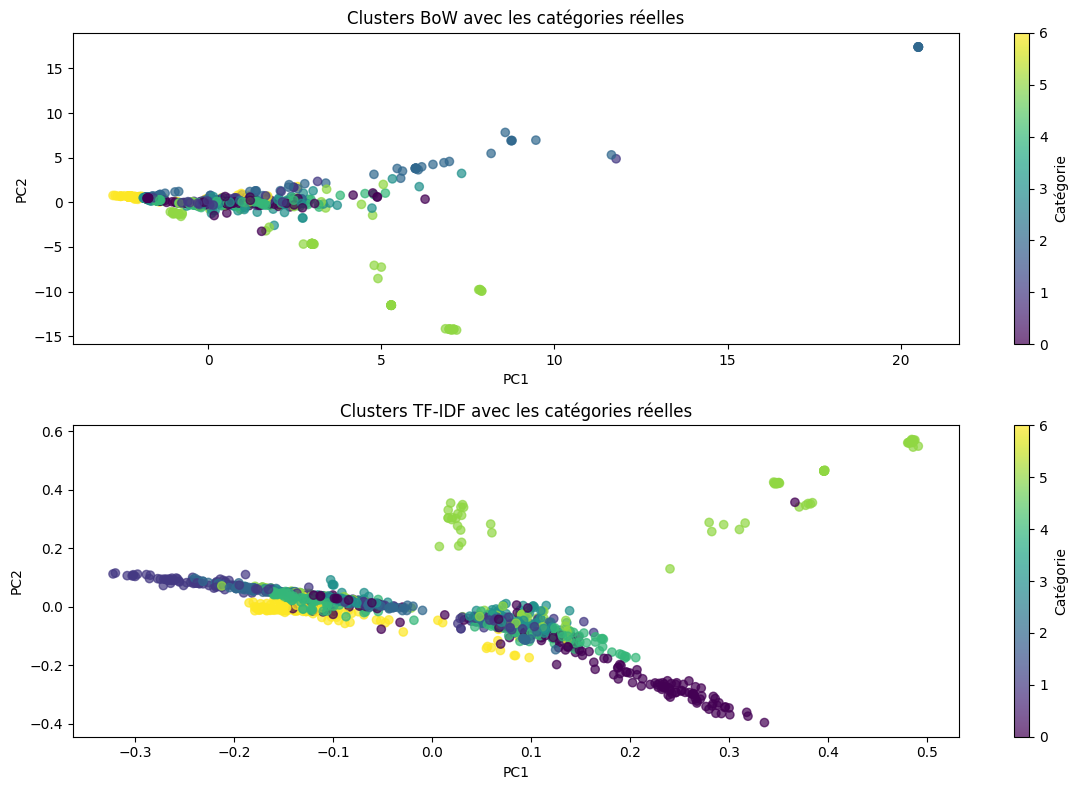

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convertir les étiquettes de catégorie en valeurs numériques
label_encoder = LabelEncoder()
data['category_encoded'] = label_encoder.fit_transform(data['category'])

# Visualiser les clusters avec les catégories réelles
plt.figure(figsize=(12, 8))

# Visualisation des clusters BoW avec les catégories réelles
plt.subplot(2, 1, 1)
plt.scatter(reduced_features_bow[:, 0], reduced_features_bow[:, 1], c=data['category_encoded'], cmap='viridis', alpha=0.7)
plt.title("Clusters BoW avec les catégories réelles")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Catégorie')

# Visualisation des clusters TF-IDF avec les catégories réelles
plt.subplot(2, 1, 2)
plt.scatter(reduced_features_tfidf[:, 0], reduced_features_tfidf[:, 1], c=data['category_encoded'], cmap='viridis', alpha=0.7)
plt.title("Clusters TF-IDF avec les catégories réelles")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Catégorie')

plt.tight_layout()
plt.show()


**************** 4 eme etappe : Mesure de similarité pour confirmer l'analyse visuelle (mesure de similarité entre les catégories réelles et les catégories issues de la segmentation en clusters) *************

In [ ]:
from sklearn.metrics import adjusted_rand_score

# Calcul du score de similarité (score de Rand ajusté) pour les clusters BoW
rand_score_bow = adjusted_rand_score(data['category'], clusters_bow)
print("Adjusted Rand score pour BoW:", rand_score_bow)

# Calcul du score de similarité (score de Rand ajusté) pour les clusters TF-IDF
rand_score_tfidf = adjusted_rand_score(data['category'], clusters_tfidf)
print("Adjusted Rand score pour TF-IDF:", rand_score_tfidf)


Adjusted Rand score pour BoW: 0.057192672634979756
Adjusted Rand score pour TF-IDF: 0.1377859802288054


Interprétation :
    
  * Le score de Rand ajusté varie de -1 à 1. Un score de 1 indique une parfaite similitude entre les ensembles d'étiquettes, un score de 0 indique une similitude aléatoire et un score négatif indique une dissimilarité.
Dans notre cas :

    * Pour le score de Rand ajusté pour BoW (Bag-of-Words) : on a environ  0.057 ==>  Cela indique une faible similitude entre les catégories réelles et les clusters obtenus à partir des données BoW. Cela signifie que les clusters ne correspondent pas étroitement aux catégories réelles.

    * Pour le score de Rand ajusté pour TF-IDF, on a environ 0.137. Ce score est plus élevé que pour BoW,===> ce qui indique une meilleure similitude entre les catégories réelles et les clusters obtenus à partir des données TF-IDF. Cela suggère que les clusters obtenus à partir des données TF-IDF correspondent mieux aux catégories réelles que ceux obtenus à partir des données BoW.
    
Conclusion :
* Les scores que nous avons obtenus sont relativement bas, ce qui indique une faible cohésion des clusters. ==> Cela suggère que les produits de même catégorie ne sont pas bien regroupés.

# 2éme approche : # Feature Extraction avec : Word Embeddings  FastText

In [ ]:
Etape 1 :  Extraction des embeddings de phrases

In [ ]:
# Charger les données et les prétraiter
texts = dt['lemmatized_text'].tolist()
categories = data['category'].tolist()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import FastText
import pandas as pd


fasttext_model = FastText(sentences=texts, window=5, min_count=5, workers=4, sg=1)

# Définir une fonction pour obtenir l'embedding de phrase avec FastText
def get_sentence_embedding_fasttext(sentence, model):
    words = sentence.split()
    embeddings = [model.wv[word] for word in words if word in model.wv]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model.vector_size)


In [ ]:
Etape2 : Clustering des embeddings de phrases

In [ ]:
from sklearn.cluster import KMeans
from gensim.models import FastText
from sklearn.decomposition import PCA

# Obtenir les embeddings de phrases pour tout le corpus
sentence_embeddings = [get_sentence_embedding_fasttext(sentence, fasttext_model) for sentence in texts]

# Réduction de dimension avec PCA en 2 dimensions
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(sentence_embeddings)

# Clustering avec KMeans
kmeans = KMeans(n_clusters=7)
clusters = kmeans.fit_predict(reduced_features)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


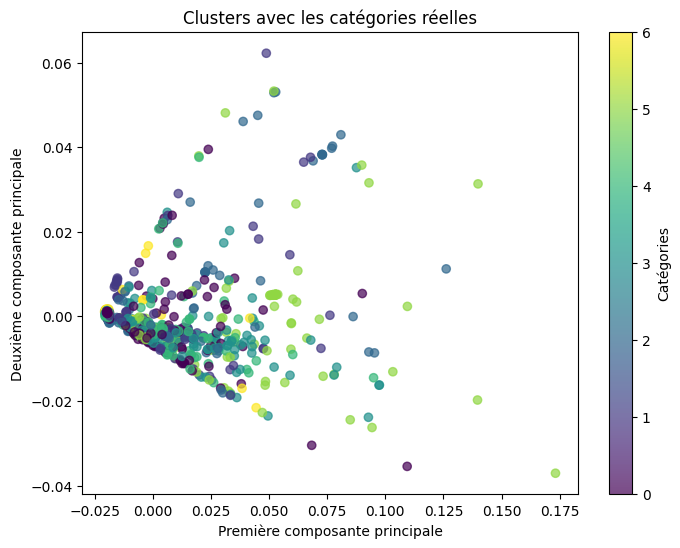

In [ ]:
import matplotlib.pyplot as plt

# Convertir les étiquettes de catégorie en valeurs numériques
unique_categories = np.unique(categories)
category_to_numeric = {category: i for i, category in enumerate(unique_categories)}
numeric_labels = np.array([category_to_numeric[category] for category in categories])

# Utiliser les valeurs numériques comme couleurs
colors = numeric_labels

# Tracer le nuage de points avec les couleurs des catégories
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=colors, cmap='viridis', alpha=0.7)
plt.title("Clusters avec les catégories réelles")
plt.xlabel("Première composante principale")
plt.ylabel("Deuxième composante principale")
plt.colorbar(label='Catégories')
plt.show()

In [ ]:
from sklearn.metrics import adjusted_rand_score

# Calcul du score de similarité (Adjusted Rand Score)
rand_score = adjusted_rand_score(categories, clusters)
print("Score de similarité (Adjusted Rand Score) entre les catégories réelles et les clusters :", rand_score)

Score de similarité (Adjusted Rand Score) entre les catégories réelles et les clusters : 0.03801418212052145


Interprétation :

un score de 0.038 indique une très faible similarité entre les clusters et les catégories réelles. Cela signifie que les clusters obtenus ne correspondent pas bien aux catégories réelles des données. Les phrases appartenant à des catégories similaires sont dispersées dans différents clusters

conclusion :

 le faible score de similarité suggère que le regroupement automatique basé sur les embeddings FastTex

# 3éme approche Bert

In [ ]:
pip install transformers


In [ ]:
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer

# Charger le modèle BERT et le tokenizer associé
model_name = "bert-base-uncased"
bert_model = TFBertModel.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)

Exception ignored in: <function _xla_gc_callback at 0x7e1cdfa996c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# Utiliser la colonne 'lemmatized_text' pour les descriptions nettoyées
texts = dt['lemmatized_text'].tolist()

# Utiliser la colonne 'category' pour les catégories réelles
categories = data['category'].tolist()

# Limiter la taille des textes
max_length = 128
texts = [text[:max_length] for text in texts]

# Utiliser le tokenizer pour prétraiter les textes et obtenir les embeddings
encoded_inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='tf', max_length=max_length)

# Passer les inputs au modèle BERT pour obtenir les embeddings
outputs = bert_model(encoded_inputs)

# Récupérer les embeddings de la couche cachée finale
embeddings = outputs.last_hidden_state.numpy()


Remarque : on a  limiter la taille des textes en donnant 128 car la taille de  tenseur est trop importante pour notre environnement c'est pour cela on a limiter la taille du texte pour eviter le probléme de mémoire .

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Vérifier la forme des embeddings
print("Shape of embeddings before PCA:", embeddings.shape)

# Si les embeddings ont une dimension supplémentaire, les aplatir
if embeddings.ndim > 2:
    flattened_embeddings = embeddings.reshape(embeddings.shape[0], -1)  # Aplatir les embeddings
else:
    flattened_embeddings = embeddings

# Vérifier à nouveau la forme après aplatissement
print("Shape of flattened embeddings:", flattened_embeddings.shape)

# Réduction en 2 dimensions avec PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(flattened_embeddings)

# Afficher la forme des features réduites après PCA
print("Shape of reduced features after PCA:", reduced_features.shape)


Shape of embeddings before PCA: (1050, 48, 768)
Shape of flattened embeddings: (1050, 36864)
Shape of reduced features after PCA: (1050, 2)


  interprétation :
 * La forme des embeddings avant l'application de PCA est (1050, 48, 768), ce qui indique qu'il y a 1050 embeddings, chacun ayant une dimension de 48 par 768.
 * Après avoir aplatir les embeddings, leur forme est devenue (1050, 36864), ce qui signifie que chaque embedding est maintenant représenté sous forme d'un vecteur de longueur 36864.
 * Après l'application de PCA pour réduire les dimensions à 2, la forme des features réduites est devenue (1050, 2), ce qui signifie que chaque embedding est maintenant représenté par deux caractéristiques seulement.

2 éme etape :  clustering et visualisation

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


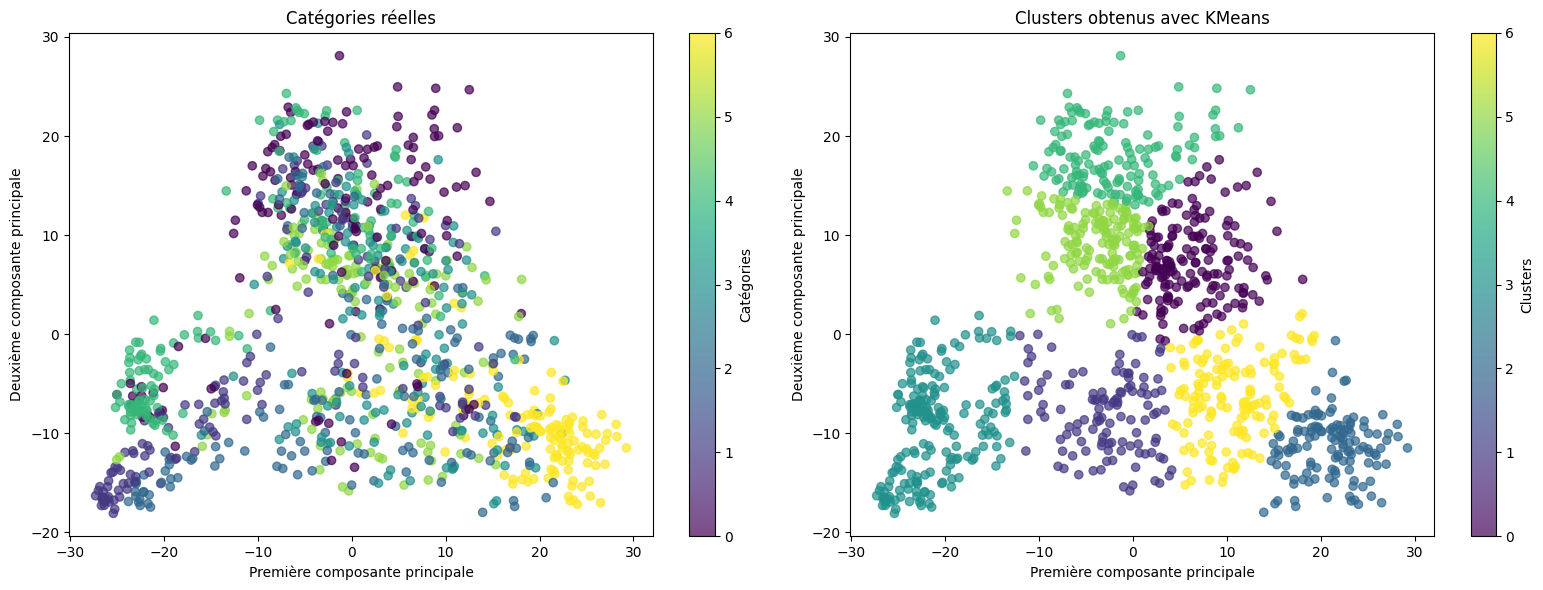

In [ ]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

# Clustering avec KMeans
kmeans = KMeans(n_clusters=7)  # 7 clusters selon vos données
clusters = kmeans.fit_predict(reduced_features)

# Convertir les étiquettes de catégorie en valeurs numériques
unique_categories = np.unique(categories)
category_to_numeric = {category: i for i, category in enumerate(unique_categories)}
numeric_labels = np.array([category_to_numeric[category] for category in categories])

# Utiliser les valeurs numériques comme couleurs pour les catégories réelles
colors_real = numeric_labels

# Utiliser les valeurs numériques des clusters comme couleurs pour les clusters
colors_clusters = clusters

# Tracer le nuage de points avec les couleurs des catégories réelles
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=colors_real, cmap='viridis', alpha=0.7)
plt.title("Catégories réelles")
plt.xlabel("Première composante principale")
plt.ylabel("Deuxième composante principale")
plt.colorbar(label='Catégories')

# Tracer le nuage de points avec les couleurs des clusters
plt.subplot(1, 2, 2)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=colors_clusters, cmap='viridis', alpha=0.7)
plt.title("Clusters obtenus avec KMeans")
plt.xlabel("Première composante principale")
plt.ylabel("Deuxième composante principale")
plt.colorbar(label='Clusters')

plt.tight_layout()
plt.show()


In [ ]:
# Calculer la similarité entre les catégories réelles et les clusters
similarity_score = adjusted_rand_score(numeric_labels, clusters)
print("Score de similarité (Adjusted Rand Score) entre les catégories réelles et les clusters :", similarity_score)

Score de similarité (Adjusted Rand Score) entre les catégories réelles et les clusters : 0.13969916876062985


interprétation : Un score de similarité (Adjusted Rand Score) de 0.1354 indique une correspondance faible entre les catégories réelles et les clusters obtenus.

==>  Il est possible que les descriptions textuelles ne soient pas suffisamment distinctes pour permettre une classification précise.

# 4 éme approche :  Approche USE

In [ ]:
pip install --upgrade tensorflow_hub


In [ ]:
pip install --upgrade tensorflow tensorflow_hub


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 867.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 993.2 kB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
   

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

# Chargement du modèle Universal Sentence Encoder
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
embed = hub.load(module_url)
print("Module", module_url, "chargé")


Module https://tfhub.dev/google/universal-sentence-encoder/4 chargé


In [ ]:
# Charger les données et les prétraiter
texts = dt['lemmatized_text'].tolist()
categories = data['category'].tolist()


In [ ]:
# Obtenir les embeddings pour chaque description de produit
embeddings = embed(texts)

In [ ]:
from sklearn.decomposition import PCA
# Réduction de dimension avec PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(embeddings)


In [ ]:
from sklearn.cluster import KMeans

# Clustering avec KMeans
kmeans = KMeans(n_clusters=7)
clusters = kmeans.fit_predict(reduced_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


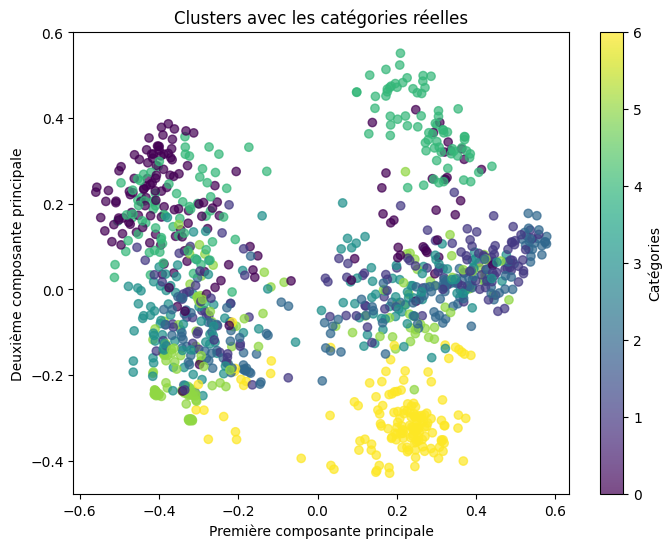

In [ ]:
# Convertir les étiquettes de catégorie en valeurs numériques
unique_categories = np.unique(categories)
category_to_numeric = {category: i for i, category in enumerate(unique_categories)}
numeric_labels = np.array([category_to_numeric[category] for category in categories])

# Utiliser les valeurs numériques comme couleurs
colors = numeric_labels

# Tracer le nuage de points avec les couleurs des catégories
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=colors, cmap='viridis', alpha=0.7)
plt.title("Clusters avec les catégories réelles")
plt.xlabel("Première composante principale")
plt.ylabel("Deuxième composante principale")
plt.colorbar(label='Catégories')
plt.show()

In [ ]:
from sklearn.metrics import adjusted_rand_score

# Calcul du score de similarité (Adjusted Rand Score)
rand_score = adjusted_rand_score(categories, clusters)
print("Score de similarité (Adjusted Rand Score) entre les catégories réelles et les clusters :", rand_score)

Score de similarité (Adjusted Rand Score) entre les catégories réelles et les clusters : 0.2751517125727494


** Interprétation :
 Un score de 0.27 indique une similitude modérée entre les catégories réelles et les clusters. Cela signifie que les clusters formés à partir des embeddings des descriptions de produits captent certains aspects des catégories réelles, mais il y a aussi des différences significatives.